# Problem statement: 

Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing, use bank_full.csv


In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn import * 

In [25]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


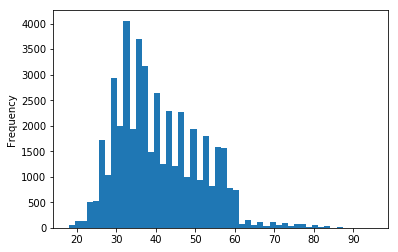

In [28]:
df.age.plot.hist(bins = 50)

In [69]:
df["age_group"] = np.where(df.age > 60, "Senior", "Non-senior")

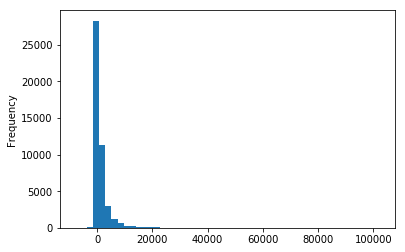

In [30]:
df.balance.plot.hist(bins = 50)

In [35]:
idx = df[df.balance <= 0].index
df.loc[idx, "balance"] = 0.1

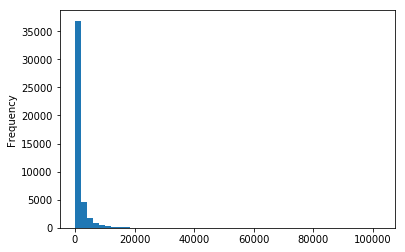

In [39]:
df.balance.plot.hist(bins = 50)

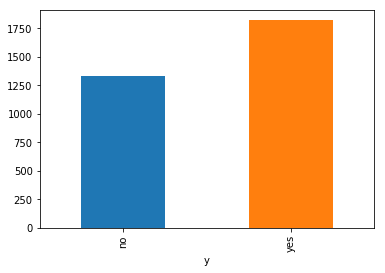

In [88]:
df.groupby("y").balance.mean().plot.bar()

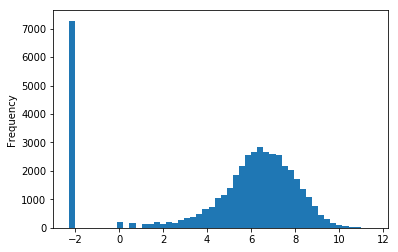

In [41]:
pd.Series(np.log(df.balance)).plot.hist(bins = 50)

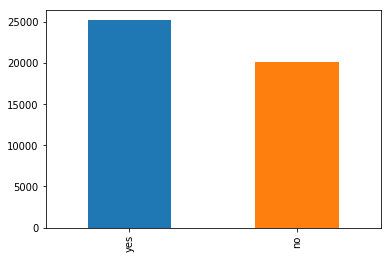

In [42]:
df.housing.value_counts().plot.bar()

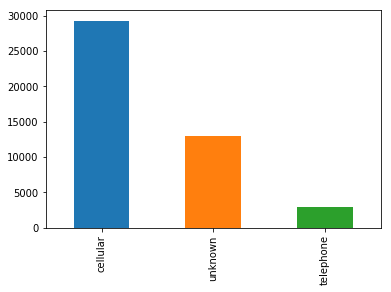

In [43]:
df.contact.value_counts().plot.bar()

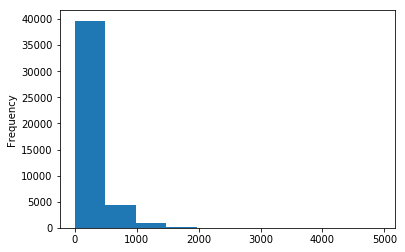

In [44]:
df.duration.plot.hist()

In [45]:
df["duration_long"] = np.where(df.duration > 60, "high", "normal")

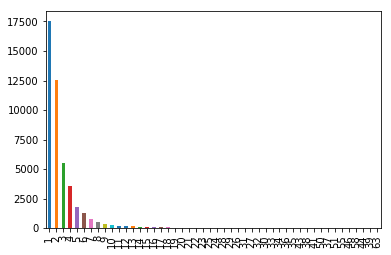

In [46]:
df.campaign.value_counts().plot.bar()

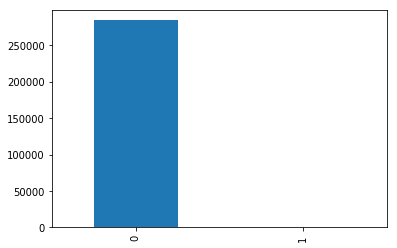

In [9]:
df.Class.value_counts().plot.bar()

In [58]:
df[target].value_counts() / df.shape[0]

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [70]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,duration_long
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Non-senior,high
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Non-senior,high
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Non-senior,high
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Non-senior,high
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,Non-senior,high


In [80]:
target = "y"
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[target])
X = df.copy()
del X[target]

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Accuracy: 0.9004718372161604


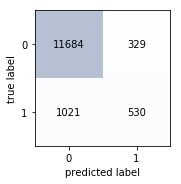

In [81]:
y_test_pred = pipe.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred));

In [82]:
pd.Series(y_test).value_counts()

0    12013
1     1551
dtype: int64

In [83]:
y_test_prob.shape, y_test.shape

((13564,), (13564,))

Text(0,0.5,'TPR')

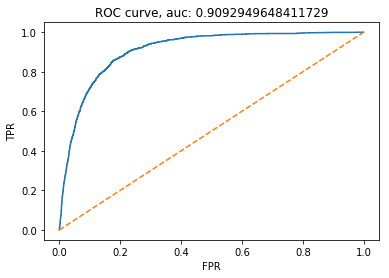

In [84]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC curve, auc: " + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [87]:
param_grid = {
    "est__C": 10 ** np.linspace(-2, 2, 5) 
}

grid = model_selection.GridSearchCV(pipe, param_grid, cv = 5,                           
        verbose = True, scoring = "accuracy")
grid.fit(X_train, y_train)
auc = metrics.accuracy_score(y_test, 
                grid.best_estimator_.predict(X_test))
print("Accuracy score for testing dataset", auc)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.3s finished


Accuracy score for testing dataset 0.9004718372161604
